# ID3 Algorithm

## Step 1: Calculate Overall Entropy

For a dataset \( S \) with \( k \) classes, the entropy is defined as:

$$
H(S) = -\sum_{i=1}^{k} p(i) \, \log_2 \bigl(p(i)\bigr)
$$

For binary classification (e.g., "Yes" and "No"):

$$
H(S) = -\,p(\text{Yes}) \, \log_2 \bigl(p(\text{Yes})\bigr) -\, p(\text{No}) \, \log_2 \bigl(p(\text{No})\bigr)
$$

---

## Step 2: Evaluate Each Attribute

For an attribute \( A \) with possible values \( v_1, v_2,......, v_m \):

1. **Partition the Data:**  
   Divide the dataset \( S \) into subsets based on the values of \( A \):

   $$
   S = S_{v_1} \cup S_{v_2} \cup \cdots \cup S_{v_m}
   $$

2. **Calculate Subset Entropy:**  
   For each subset \( S_{v_j} \), compute the entropy:

   $$
   H(S_{v_j}) = -\sum_{i=1}^{k} p(i \mid S_{v_j}) \, \log_2 \bigl(p(i \mid S_{v_j})\bigr)
   $$

3. **Compute Weighted Entropy:**  
   The weighted entropy for attribute \( A \) is:

   $$
   H(S \mid A) = \sum_{j=1}^{m} \frac{|S_{v_j}|}{|S|} \, H(S_{v_j})
   $$

---

## Step 3: Determine Information Gain

The information gain when splitting on attribute \( A \) is the reduction in entropy:

$$
\text{Gain}(S, A) = H(S) - H(S \mid A)
$$

---

## Step 4: Select the Best Attribute

Choose the attribute with the highest information gain:

$$
A^* = \arg\max_{A} \, \text{Gain}(S, A)
$$

---

## Step 5: Split the Data

Split the dataset \( S \) based on the chosen attribute \( A^* \). Each branch of the tree corresponds to one of the values \( v_j \) of \( A^* \).

---

## Step 6: Recursively Build the Tree

For each branch corresponding to a subset \( S_{v_j} \):

- **Recursion:**  
  Apply Steps 1–4 to \( S_{v_j} \) using the remaining attributes.

- **Stopping Conditions:**  
  Stop splitting further if either:
  
  1. The subset \( S_{v_j} \) is **pure** (all examples belong to the same class), or  
  2. There are no remaining attributes to split on.

---

### Step 7: (Optional) Prune the Tree

After the tree is fully grown, prune the tree by removing branches that contribute little to the overall predictive accuracy.


This process outlines the core of the ID3 algorithm for decision tree construction.


# Example for ID3

The "Play Tennis" dataset consists of 14 examples with 4 features and a binary target ("PlayTennis"). The dataset is:

| Example | Outlook   | Temperature | Humidity | Wind   | PlayTennis |
|---------|-----------|-------------|----------|--------|------------|
| 1       | Sunny     | Hot         | High     | Weak   | No         |
| 2       | Sunny     | Hot         | High     | Strong | No         |
| 3       | Overcast  | Hot         | High     | Weak   | Yes        |
| 4       | Rain      | Mild        | High     | Weak   | Yes        |
| 5       | Rain      | Cool        | Normal   | Weak   | Yes        |
| 6       | Rain      | Cool        | Normal   | Strong | No         |
| 7       | Overcast  | Cool        | Normal   | Strong | Yes        |
| 8       | Sunny     | Mild        | High     | Weak   | No         |
| 9       | Sunny     | Cool        | Normal   | Weak   | Yes        |
| 10      | Rain      | Mild        | Normal   | Weak   | Yes        |
| 11      | Sunny     | Mild        | Normal   | Strong | Yes        |
| 12      | Overcast  | Mild        | High     | Strong | Yes        |
| 13      | Overcast  | Hot         | Normal   | Weak   | Yes        |
| 14      | Rain      | Mild        | High     | Strong | No         |

In this dataset, there are **9 "Yes"** and **5 "No"** outcomes.

---

## Step 1: Calculate Overall Entropy

The entropy of the target set \( S \) is given by

$$
H(S) = - p(\text{Yes}) \log_2 \left( p(\text{Yes}) \right) - p(\text{No}) \log_2 \left( p(\text{No}) \right).
$$

Here, 
$$
p(\text{Yes}) = \frac{9}{14} \quad \text{and} \quad p(\text{No}) = \frac{5}{14}.
$$

Plugging in the numbers:

$$
H(S) = -\left(\frac{9}{14}\right) \log_2 \left(\frac{9}{14}\right) - \left(\frac{5}{14}\right) \log_2 \left(\frac{5}{14}\right).
$$
Using approximate values:

Using approximate values:

- \(\frac{9}{14} \approx 0.64\) and \(\log_2(0.64) \approx -0.64\)
- \(\frac{5}{14} \approx 0.36\) and \(\log_2(0.36) \approx -1.48\)



Thus,

$$
H(S) \approx -0.643 \times (-0.643) - 0.357 \times (-1.485) \approx 0.940.
$$

---

## Step 2: Evaluate Each Attribute

We compute the entropy for each attribute by partitioning the dataset and then calculating the weighted entropy.

### (a) Attribute: **Outlook**

**Values:** Sunny, Overcast, Rain

1. **Sunny:**  
   - Examples: 1, 2, 8, 9, 11 (5 examples)  
   - "Yes": 2 (Examples 9 and 11)  
   - "No": 3 (Examples 1, 2, 8)  
   
   Entropy for Sunny:
   $$
   H(\text{Sunny}) = -\frac{2}{5} \log_2 \left(\frac{2}{5}\right) - \frac{3}{5} \log_2 \left(\frac{3}{5}\right).
   $$
   Using:
   - \(\frac{2}{5} = 0.4\) and \(\log_2(0.4) \approx -1.322\)
   - \(\frac{3}{5} = 0.6\) and \(\log_2(0.6) \approx -0.737\)
   
   Therefore,
   $$
   H(\text{Sunny}) \approx -0.4(-1.322) - 0.6(-0.737) \approx 0.529 + 0.442 \approx 0.971.
   $$

2. **Overcast:**  
   - Examples: 3, 7, 12, 13 (4 examples)  
   - All are "Yes" (pure subset)  
   
   Entropy for Overcast:
   $$
   H(\text{Overcast}) = 0.
   $$

3. **Rain:**  
   - Examples: 4, 5, 6, 10, 14 (5 examples)  
   - "Yes": 3 (Examples 4, 5, 10)  
   - "No": 2 (Examples 6, 14)  
   
   Entropy for Rain:
   $$
   H(\text{Rain}) = -\frac{3}{5} \log_2 \left(\frac{3}{5}\right) - \frac{2}{5} \log_2 \left(\frac{2}{5}\right) \approx 0.971.
   $$

**Weighted Entropy for Outlook:**

$$
H(S \mid \text{Outlook}) = \frac{5}{14}(0.971) + \frac{4}{14}(0) + \frac{5}{14}(0.971) \approx 0.694.
$$

**Information Gain for Outlook:**

$$
\text{Gain(Outlook)} = H(S) - H(S \mid \text{Outlook}) \approx 0.940 - 0.694 \approx 0.246.
$$

---

### (b) Attribute: **Temperature**

**Values:** Hot, Mild, Cool

1. **Hot:**  
   - Examples: 1, 2, 3, 13 (4 examples)  
   - "Yes": 2 (Examples 3 and 13)  
   - "No": 2 (Examples 1 and 2)  
   
   Entropy for Hot:
   $$
   H(\text{Hot}) = -\left(0.5 \log_2 0.5 + 0.5 \log_2 0.5\right) = 1.0.
   $$

2. **Mild:**  
   - Examples: 4, 8, 10, 11, 12, 14 (6 examples)  
   - "Yes": 4 (Examples 4, 10, 11, 12)  
   - "No": 2 (Examples 8, 14)  
   
   Entropy for Mild:
   $$
   H(\text{Mild}) = -\left(\frac{4}{6}\log_2\frac{4}{6} + \frac{2}{6}\log_2\frac{2}{6}\right) \approx 0.918.
   $$

3. **Cool:**  
   - Examples: 5, 6, 7, 9 (4 examples)  
   - "Yes": 3 (Examples 5, 7, 9)  
   - "No": 1 (Example 6)  
   
   Entropy for Cool:
   $$
   H(\text{Cool}) = -\left(\frac{3}{4}\log_2\frac{3}{4} + \frac{1}{4}\log_2\frac{1}{4}\right) \approx 0.811.
   $$

**Weighted Entropy for Temperature:**

$$
H(S \mid \text{Temperature}) = \frac{4}{14}(1.0) + \frac{6}{14}(0.918) + \frac{4}{14}(0.811) \approx 0.912.
$$

**Information Gain for Temperature:**

$$
\text{Gain(Temperature)} = H(S) - H(S \mid \text{Temperature}) \approx 0.940 - 0.912 \approx 0.028.
$$

---

### (c) Attribute: **Humidity**

**Values:** High, Normal

1. **High:**  
   - Examples: 1, 2, 3, 4, 8, 12, 14 (7 examples)  
   - "Yes": 3 (Examples 3, 4, 12)  
   - "No": 4 (Examples 1, 2, 8, 14)  
   
   Entropy for High:
   $$
   H(\text{High}) = -\left(\frac{3}{7}\log_2\frac{3}{7} + \frac{4}{7}\log_2\frac{4}{7}\right) \approx 0.985.
   $$

2. **Normal:**  
   - Examples: 5, 6, 7, 9, 10, 11, 13 (7 examples)  
   - "Yes": 6 (Examples 5, 7, 9, 10, 11, 13)  
   - "No": 1 (Example 6)  
   
   Entropy for Normal:
   $$
   H(\text{Normal}) = -\left(\frac{6}{7}\log_2\frac{6}{7} + \frac{1}{7}\log_2\frac{1}{7}\right) \approx 0.592.
   $$

**Weighted Entropy for Humidity:**

$$
H(S \mid \text{Humidity}) = \frac{7}{14}(0.985) + \frac{7}{14}(0.592) \approx 0.789.
$$

**Information Gain for Humidity:**

$$
\text{Gain(Humidity)} = H(S) - H(S \mid \text{Humidity}) \approx 0.940 - 0.789 \approx 0.151.
$$

---

### (d) Attribute: **Wind**

**Values:** Weak, Strong

1. **Weak:**  
   - Examples: 1, 3, 4, 5, 8, 9, 10, 13 (8 examples)  
   - "Yes": 6 (Examples 3, 4, 5, 9, 10, 13)  
   - "No": 2 (Examples 1, 8)  
   
   Entropy for Weak:
   $$
   H(\text{Weak}) = -\left(\frac{6}{8}\log_2\frac{6}{8} + \frac{2}{8}\log_2\frac{2}{8}\right) \approx 0.811.
   $$

2. **Strong:**  
   - Examples: 2, 6, 7, 11, 12, 14 (6 examples)  
   - "Yes": 3 (Examples 7, 11, 12)  
   - "No": 3 (Examples 2, 6, 14)  
   
   Entropy for Strong:
   $$
   H(\text{Strong}) = -\left(\frac{3}{6}\log_2\frac{3}{6} + \frac{3}{6}\log_2\frac{3}{6}\right) = 1.0.
   $$

**Weighted Entropy for Wind:**

$$
H(S \mid \text{Wind}) = \frac{8}{14}(0.811) + \frac{6}{14}(1.0) \approx 0.892.
$$

**Information Gain for Wind:**

$$
\text{Gain(Wind)} = H(S) - H(S \mid \text{Wind}) \approx 0.940 - 0.892 \approx 0.048.
$$

---

## Step 3: Compare Information Gains

| **Attribute**  | **Information Gain** |
|----------------|----------------------|
| Outlook        | 0.246                |
| Temperature    | 0.028                |
| Humidity       | 0.151                |
| Wind           | 0.048                |

The attribute with the highest information gain is **Outlook**. This means that when building a decision tree, you would first split on the **Outlook** attribute.

---

## Summary

- **Overall entropy:** \(\approx 0.940\)
- **Information gains:**
  - Outlook: \(0.246\)
  - Humidity: \(0.151\)
  - Wind: \(0.048\)
  - Temperature: \(0.028\)

**Conclusion:**  
Splitting the data first on the Outlook attribute maximizes the information gain and best separates the examples into groups that are more homogeneous in terms of "PlayTennis."


# Simple Regression Example: Computing \(R^2\)

This example demonstrates how to compute the \(R^2\) score (Coefficient of Determination) for a simple linear regression model.

## Steps for Computing \(R^2\)

1. **Compute the Mean of \(y\):**  
   The mean of the target variable is:
   $$
   \bar{y} = \frac{1}{n}\sum_{i=1}^{n} y_i.
   $$

2. **Compute the Total Sum of Squares (\(SS_tot\)):**  
   This measures the total variability in \(y\):
   $$
   SS_{\text{tot}} = \sum_{i=1}^{n} \left(y_i - \bar{y}\right)^2.
   $$

3. **Fit a Linear Regression Model:**  
   Assume a model of the form:
   $$
   \hat{y} = \beta_0 + \beta_1 x.
   $$
   - Compute the mean of \(x\):
     $$
     \bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
     $$
   - Compute the slope:
     $$
     \beta_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}.
     $$
   - Compute the intercept:
     $$
     \beta_0 = \bar{y} - \beta_1 \bar{x}.
     $$

4. **Compute the Residual Sum of Squares (\(SS_{\text{res}}\)):**  
   This is the sum of squared differences between the actual and predicted values:
   $$
   SS_{\text{res}} = \sum_{i=1}^{n} \left(y_i - \hat{y}_i\right)^2.
   $$

5. **Compute the \(R^2\) Score:**  
   The \(R^2\) score is given by:
   $$
   R^2 = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}}.
   $$

---

## Worked Example

Consider the following dataset with 5 data points:

| \(i\) | \(x_i\) | \(y_i\) |
|:-----:|:-------:|:-------:|
| 1     | 1       | 2       |
| 2     | 2       | 3       |
| 3     | 3       | 5       |
| 4     | 4       | 4       |
| 5     | 5       | 6       |

### Step 1: Compute the Mean of \(y\)
$$
\bar{y} = \frac{2+3+5+4+6}{5} = \frac{20}{5} = 4.
$$

### Step 2: Compute \(SS_{\text{tot}}\)
$$
SS_{\text{tot}} = \sum_{i=1}^{5} (y_i - \bar{y})^2.
$$
Calculating each term:
$$
\begin{aligned}
(2-4)^2 &= (-2)^2 = 4, \\
(3-4)^2 &= (-1)^2 = 1, \\
(5-4)^2 &= (1)^2 = 1, \\
(4-4)^2 &= (0)^2 = 0, \\
(6-4)^2 &= (2)^2 = 4.
\end{aligned}
$$
Thus,
$$
SS_{\text{tot}} = 4+1+1+0+4 = 10.
$$

### Step 3: Fit a Linear Regression Model

Assume the model:
$$
\hat{y} = \beta_0 + \beta_1 x.
$$

**Compute the Mean of \(x\):**
$$
\bar{x} = \frac{1+2+3+4+5}{5} = \frac{15}{5} = 3.
$$

**Compute the Slope \(\beta_1\):**
$$
\beta_1 = \frac{\sum_{i=1}^{5} (x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^{5} (x_i-\bar{x})^2}.
$$

\textbf{Numerator:}
$$
\begin{aligned}
&(1-3)(2-4) + (2-3)(3-4) + (3-3)(5-4) \\
&\quad + (4-3)(4-4) + (5-3)(6-4) \\
&= (-2)(-2) + (-1)(-1) + 0\cdot1 + 1\cdot0 + 2\cdot2 \\
&= 4+1+0+0+4 = 9.
\end{aligned}
$$

\textbf{Denominator:}
$$
(1-3)^2+(2-3)^2+(3-3)^2+(4-3)^2+(5-3)^2 = 4+1+0+1+4 = 10.
$$

Thus,
$$
\beta_1 = \frac{9}{10} = 0.9.
$$

**Compute the Intercept:**
$$
\beta_0 = \bar{y} - \beta_1 \bar{x} = 4 - 0.9\times3 = 4 - 2.7 = 1.3.
$$

The fitted model is:
$$
\hat{y} = 1.3 + 0.9x.
$$

### Step 4: Compute Predicted Values and \(SS_{\text{res}}\)

**Predicted Values:**

For each \(x_i\):
$$
\begin{aligned}
\hat{y}_1 &= 1.3 + 0.9(1) = 2.2, \\
\hat{y}_2 &= 1.3 + 0.9(2) = 3.1, \\
\hat{y}_3 &= 1.3 + 0.9(3) = 4.0, \\
\hat{y}_4 &= 1.3 + 0.9(4) = 4.9, \\
\hat{y}_5 &= 1.3 + 0.9(5) = 5.8.
\end{aligned}
$$

**Residual Sum of Squares:**
$$
SS_{\text{res}} = \sum_{i=1}^{5}(y_i - \hat{y}_i)^2.
$$
Calculating each term:
$$
\begin{aligned}
(2-2.2)^2 &= (-0.2)^2 = 0.04, \\
(3-3.1)^2 &= (-0.1)^2 = 0.01, \\
(5-4.0)^2 &= (1.0)^2 = 1.00, \\
(4-4.9)^2 &= (-0.9)^2 = 0.81, \\
(6-5.8)^2 &= (0.2)^2 = 0.04.
\end{aligned}
$$
Thus,
$$
SS_{\text{res}} = 0.04+0.01+1.00+0.81+0.04 = 1.90.
$$

### Step 5: Compute \(R^2\)
$$
R^2 = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}} = 1 - \frac{1.90}{10} = 1 - 0.19 = 0.81.
$$

This means that **81\% of the variability in \(y\) is explained by the model.**

---

## Summary

- **Dataset:**

  | \(i\) | \(x_i\) | \(y_i\) |
  |:-----:|:-------:|:-------:|
  | 1     | 1       | 2       |
  | 2     | 2       | 3       |
  | 3     | 3       | 5       |
  | 4     | 4       | 4       |
  | 5     | 5       | 6       |

- **Mean of \(y\):** \$$(\bar{y} = 4\).$$

- **Total Sum of Squares: ** \$$(SS_{\text{tot}} = 10\).$$

- **Fitted Model:** \$$(\hat{y} = 1.3 + 0.9x\). $$



- **Residual Sum of Squares:** \$$(SS_{\text{res}} = 1.90\).$$

- **\(R^2\)Score:** \(0.81\).

---

This example shows each step in computing the \(R^2\) score for a simple linear regression model.


Slope (beta1): 0.8999999999999997
Intercept (beta0): 1.3000000000000018


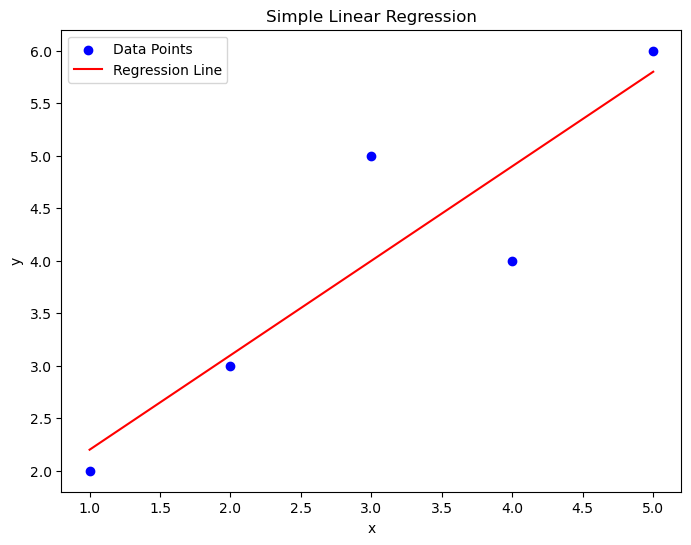

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data points
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 5, 4, 6])

# Compute the slope (beta1) and intercept (beta0) using np.polyfit
# np.polyfit returns coefficients [slope, intercept] for degree 1 polynomial
beta1, beta0 = np.polyfit(x, y, 1)
print("Slope (beta1):", beta1)
print("Intercept (beta0):", beta0)

# # Generate x values for plotting the regression line
# x_line = np.linspace(min(x), max(x), 10)
# y_line = beta1 * x_line + beta0

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x_line, y_line, color='red', label='Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()
